# Brute force random sample generation

### Original data import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('glass.csv')
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# Remove targets
df = df.drop(df.columns[[0,1,10]], axis=1)
print(df.shape)
df.head()

(214, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


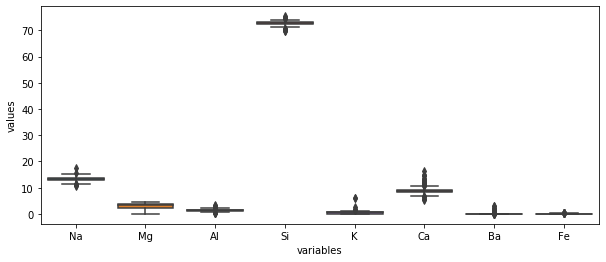

In [4]:
# See the distributions of variables

start = df.columns.get_loc('Na')          # column of 'cylinders'
end   = df.columns.get_loc('Fe') + 1     # column of 'acceleration'

fig = plt.figure(figsize=(10, 4))
sns.boxplot(data=df.iloc[:, start:end])
plt.xlabel('variables')
plt.ylabel('values')
plt.show()

In [5]:
# Remove outliers if necessary
df = df[df['K'] < 5.0]
df = df[df['Ca'] < 10.0]
print(df.shape)

(185, 8)


### Brute force

In [6]:
# Input the size of random variables
N = input('Input number of random variables for simulation : ')         # simulation sample size like 10000
N = int(N)

Input number of random variables for simulation : 1000


In [7]:
# Generate number N of random variables between min and max values in columns
list_columns = df.columns.values
print('id', 'element', 'min', 'max', sep = '\t')

random_var = np.zeros(N * len(list_columns[start:end])).reshape(N, len(list_columns[start:end]))

for i, name in enumerate(list_columns[start:end]) :
    min_column = min(df.iloc[:, start+i])
    max_column = max(df.iloc[:, start+i])
    column_rand = np.random.uniform(min_column, max_column, N)
    random_var[:, i] = column_rand
    print(i, name, min_column, max_column, sep = '\t')

df_comp_bf = pd.DataFrame(random_var)
df_comp_bf.columns = list_columns[start:end]

print('Shape of dataframe : ', df_comp_bf.shape)

id	element	min	max
0	Na	11.95	17.38
1	Mg	0.0	4.49
2	Al	0.29	3.5
3	Si	69.89	75.41
4	K	0.0	2.7
5	Ca	5.43	9.95
6	Ba	0.0	2.88
7	Fe	0.0	0.51
Shape of dataframe :  (1000, 8)


In [8]:
df_comp_bf.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,16.983546,0.198575,1.157316,72.601360,1.832136,7.108262,1.318402,0.383261
1,14.579296,0.325483,2.047588,74.276263,2.305191,7.640236,2.071955,0.094167
2,12.954191,2.055721,1.692259,73.195975,0.875772,5.807527,0.014862,0.132209
3,14.013868,3.413452,1.204621,70.052414,0.638961,8.949092,1.252920,0.127860
4,12.806943,4.213476,2.389993,73.837104,2.208304,7.162101,0.993968,0.231303


Samples generated for backward prediction


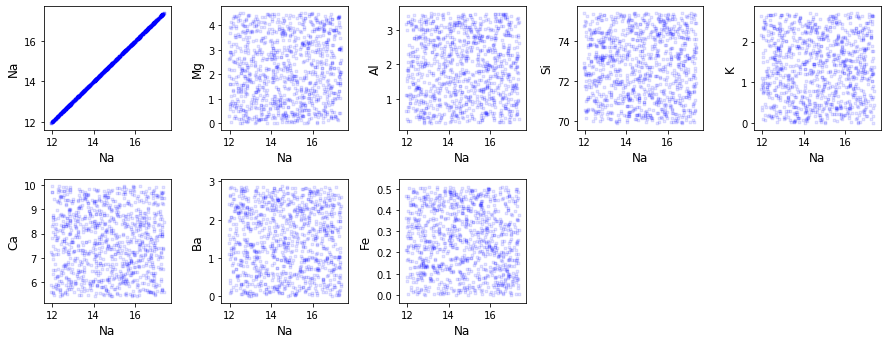

In [9]:
# Draw scatter plots of samples generated for reverse analysis
horz = 5                     # vertical number of graph
vert = 5                     # horizontal number of graph
graph_num = horz * vert      # maximum number of graphs
axes = list()

print('Samples generated for backward prediction')
fig = plt.figure(figsize=(15, 15))

for i in range(0, end-start):
    axes.append(fig.add_subplot(vert, horz, i+1))

    for j in range(start, end) :
        x_sample = df_comp_bf.iloc[:, start]
        y_sample = df_comp_bf.iloc[:, i]
        axes[i].scatter(x_sample, y_sample, c='b', marker = '.', alpha = 0.01)
        axes[i].set_xlabel(df.columns[start], size = 12)
        axes[i].set_ylabel(df.columns[i], size = 12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [10]:
# Adjust total amount say 100% if necessary

df_bf_adj = df_comp_bf.apply(lambda x: 100 * x/np.sum(x), axis=1)
df_bf_adj.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,16.718909,0.195481,1.139283,71.470089,1.803588,6.997502,1.297859,0.377289
1,14.108061,0.314963,1.981405,71.875493,2.230682,7.393287,2.004985,0.091124
2,13.392319,2.125248,1.749494,75.671557,0.905392,6.003945,0.015365,0.136681
3,14.062639,3.425332,1.208813,70.296209,0.641185,8.980237,1.257280,0.128305
4,12.332963,4.057537,2.301541,71.104425,2.126576,6.897034,0.957182,0.222743


Samples generated for reverse analysis


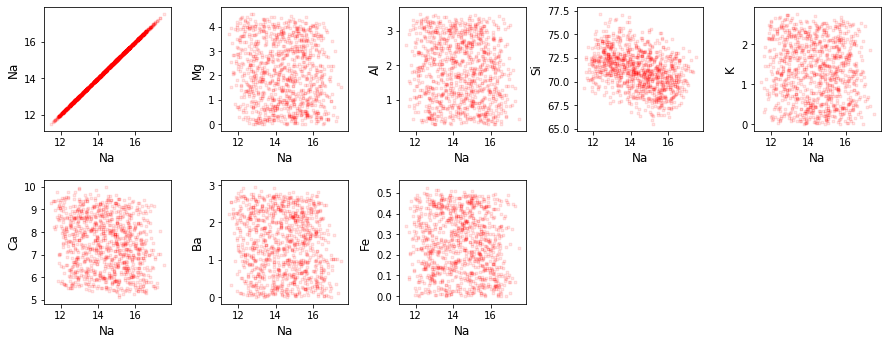

In [11]:
# draw scatter plots of samples generated for reverse analysis

horz = 5                     # vertical number of graph
vert = 5                     # horizontal number of graph
graph_num = horz * vert      # maximum number of graphs
axes = list()

print('Samples generated for reverse analysis')
fig = plt.figure(figsize=(15, 15))

for i in range(0, end-start):
    axes.append(fig.add_subplot(vert, horz, i+1))

    for j in range(start, end) :
        x_sample = df_bf_adj.iloc[:, start]
        y_sample = df_bf_adj.iloc[:, i]
        axes[i].scatter(x_sample, y_sample, c='r', marker = '.', alpha = 0.01)
        axes[i].set_xlabel(df.columns[start], size = 12)
        axes[i].set_ylabel(df.columns[i], size = 12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [12]:
# Sanity check adjustment result
test = np.sum(df_bf_adj, axis=1)
print(test[0:2])
print(test[998:1000])

0    100.0
1    100.0
dtype: float64
998    100.0
999    100.0
dtype: float64


In [13]:
# Save generated samples
df_comp_bf.to_csv('generated_samples_brute_force.csv', index = None)